In [191]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [192]:
# Uploading the input data
filepath = ('C:/Users/USER/Desktop/coursera/python/data for dl project/bootstrapped data.csv')
data =pd.read_csv(filepath)
X = data.iloc[0:1400,:-1]
y = data.iloc[0:1400,-1]
print(X.shape)
print(y.shape)

(1400, 15)
(1400,)


(15, 15)

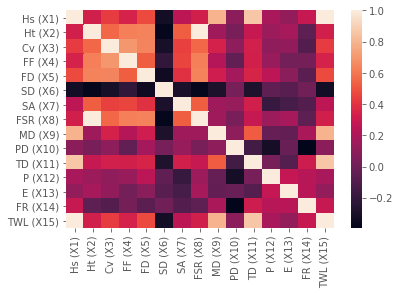

In [193]:
# Calculating correlation between input features
corr = X.corr()
import seaborn as sns
sns.heatmap(corr)
corr.shape

In [194]:
# Calculating correlation between input features
col = np.full((15),True, dtype="bool")
print(col)
flag = 0
if flag==0:
    for i in range(12):
        for j in range(i+1,12):
            if abs(corr.iloc[i,j])>0.9:
                col[j] = False
    X = X.iloc[:,col]
    flag = 1
print(col)
X.head()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True]


,Hs (X1),Ht (X2),Cv (X3),FF (X4),FD (X5),SD (X6),SA (X7),MD (X9),PD (X10),TD (X11),P (X12),E (X13),FR (X14),TWL (X15)
0,0.005167,0.005284,0.348857,1.629222,403.767705,47.488970,19.439385,55.0,45.0,55.0,60.0,35.0,25.0,51.666667
1,0.004333,0.005024,0.117171,1.664610,124.369644,123.864539,20.786422,50.0,35.0,40.0,55.0,35.0,40.0,43.333333
2,0.004267,0.005127,0.136262,1.935838,124.369644,55.876283,32.456879,45.0,35.0,40.0,55.0,40.0,30.0,42.666667
3,0.004000,0.002459,0.092059,1.307856,124.567093,187.092365,17.082540,40.0,45.0,40.0,50.0,25.0,25.0,40.000000
4,0.005367,0.004437,0.713431,1.469699,493.786526,57.456780,32.922497,60.0,45.0,55.0,60.0,40.0,25.0,53.666667


In [195]:
# Normalization followed by Splitting data into train and test sets
y = np.array(y).reshape(-1,1)
scale = StandardScaler()
X = scale.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1120, 14) (280, 14) (1120, 1) (280, 1)


In [196]:
# Inserting polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)

In [197]:
# poly.fit(X_poly,y_train)

In [198]:
# Creating model
linreg = LinearRegression()
linreg.fit(X_poly,y_train)

LinearRegression()

In [199]:
y_Pred = linreg.predict(x_test_poly)

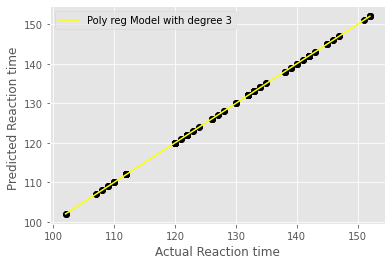

In [200]:
plt.scatter(y_test,y_Pred,color="black")
plt.plot(y_test,y_Pred,color="yellow",label = "Poly reg Model with degree 3")
plt.xlabel("Actual Reaction time")
plt.ylabel("Predicted Reaction time ")
plt.legend()


In [201]:
score = linreg.score(poly.fit_transform(X),y)
r2score = r2_score(y_test,y_Pred)
MSE = mean_squared_error(y_test,y_Pred)
MAE = mean_absolute_error(y_test,y_Pred)
print('R2 score:',r2score)
print('MSE:',MSE)
print('MAE:',MAE)
r = pd.DataFrame(np.concatenate((y_test,y_Pred), axis = 1)).corr()
pear_coff = r.iloc[0,1]
print('Pearson Correlation coefficient:',pear_coff)
index = pear_coff/MSE
print('index:',index)

R2 score: 1.0
MSE: 2.017320184597184e-27
MAE: 3.496885320990779e-14
Pearson Correlation coefficient: 0.9999999999999993
index: 4.95707130496827e+26


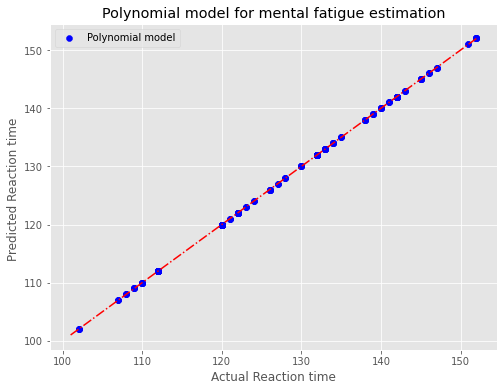

In [202]:
# Visualizing model
maxi = max(max(y_Pred), max(y_test))
mini = min(min(y_Pred), min(y_test))
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.scatter(y_test, y_Pred, label='Polynomial model', c = 'b', marker='o')
plt.plot(range(int(mini), int(maxi+1)), range(int(mini), int(maxi+1)),'-.r')
plt.title('Polynomial model for mental fatigue estimation')
plt.xlabel("Actual Reaction time")
plt.ylabel("Predicted Reaction time ")
plt.legend(loc='best')
plt.show()

In [203]:
# Calculating FastDTW
from fastdtw import fastdtw
from scipy.spatial.distance import sqeuclidean


distance, path = fastdtw(y_test,y_Pred, dist=sqeuclidean)

print(distance)

5.648496516872115e-25


In [204]:
# Calculating DTW
from dtw import dtw
from scipy.spatial.distance import sqeuclidean
d, cost_matrix, acc_cost_matrix, path = dtw(y_test,y_Pred, dist=sqeuclidean)
print(d)

5.648496516872115e-25


In [205]:
# Calculating cDTW
from cdtw import pydtw
d = pydtw.dtw(y_test,y_Pred,pydtw.Settings(step = 'p0sym',     
                                window = 'palival', 
                                param = 2.0,        
                                norm = False,       
                                compute_path = True))
d.get_dist()

ModuleNotFoundError: No module named 'cdtw'